#  Gradient Boosting for Retinal data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


### Reading the data

In [6]:
dataf=pd.read_csv('E:/Studies/BE Project/Prog/output_final_train.csv')

In [7]:
dataf.head(5)

,sr,a bv,p bv,a ex,p ex,ma a,ma p,resp
0,1,14675.0,8524.7,149.750,54.467,0.00,0.000,1
1,2,13526.0,9044.1,0.000,0.000,0.00,0.000,1
2,3,10600.0,6309.1,23.875,33.934,11.00,11.248,1
3,4,11958.0,7670.5,52.250,26.870,0.00,0.000,1
4,5,23695.0,13795.0,3671.400,1533.700,59.25,60.830,1


In [8]:
dataf.set_index('sr')

,a bv,p bv,a ex,p ex,ma a,ma p,resp
sr,,,,,,,
1,14675.0,8524.7,149.750,54.467,0.00,0.000,1
2,13526.0,9044.1,0.000,0.000,0.00,0.000,1
3,10600.0,6309.1,23.875,33.934,11.00,11.248,1
4,11958.0,7670.5,52.250,26.870,0.00,0.000,1
5,23695.0,13795.0,3671.400,1533.700,59.25,60.830,1
...,...,...,...,...,...,...,...
215,10108.0,6066.3,535.000,587.790,0.00,0.000,0
216,13441.0,8913.0,0.000,0.000,0.00,0.000,0
217,12569.0,8086.8,180.000,264.250,5.50,5.624,0


### Setting target and predictor variables

In [9]:
y=dataf.resp

In [10]:
x=dataf.drop('resp',axis=1)

### Splitting the data into test and train data

In [74]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.82)

### Defining the Gradient Boosting algorithm

In [75]:
gbModel=GradientBoostingClassifier()
gbModel.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Predictng using the model

In [76]:
yhat=gbModel.predict(test_x)

### Evaluation Technique 1: Confusion Matrix

In [77]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score 


print("Precison Score",precision_score(test_y, yhat))

print("Recall Score",recall_score(test_y, yhat))

print("F1 Score",f1_score(test_y, yhat))

print('Accuracy Score :',accuracy_score(test_y, yhat)) 

Precison Score 0.9459459459459459
Recall Score 1.0
F1 Score 0.9722222222222222
Accuracy Score : 0.95


In [78]:
from sklearn import metrics
#from sklearn.metrics import confusion_matrix 

#from sklearn.metrics import classification_report 

print(metrics.confusion_matrix(test_y, yhat, labels=[0,1]))

# Printing the precision and recall, among other metrics
print(metrics.classification_report(test_y, yhat, labels=[0,1]))

[[ 3  2]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.95      1.00      0.97        35

    accuracy                           0.95        40
   macro avg       0.97      0.80      0.86        40
weighted avg       0.95      0.95      0.94        40



### Evaluation Technique 2: CVS

[0.88636364 0.88636364 1.         1.         0.55813953]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


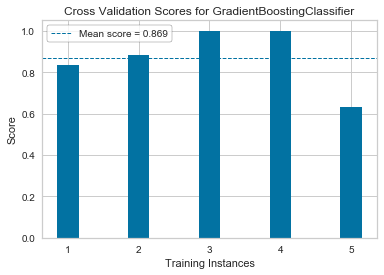

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import CVScores

#Method 1: Using the scikit module
model=GradientBoostingClassifier(n_estimators=160,learning_rate=0.005)
score=cross_val_score(model,x,y,cv=5,scoring='accuracy')
print(score)

#Method 2: Using the yellowbrick module
visualizer = CVScores(model, cv=5, scoring='f1_weighted')

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure